In [2]:
import requests
import pandas as pd
import matplotlib as plt
%matplotlib inline
from io import StringIO

# 將指定日期的股價抓下來, 存成csv
response = requests.get('http://www.tse.com.tw/exchangeReport/MI_INDEX?response=csv&date=20180727&type=ALLBUT0999&_=1532852336307')

lines = response.text.split('\n')
newlines = []
for line in lines:
    if len(line.split('",')) == 17: 
        
        newlines.append(line)
        
df = pd.read_csv(StringIO("\n".join(newlines).replace('=','')))
df = df.astype(str)                      # 將list轉為str

def f(s):                                ##############################################################
    return s.str.replace(',','')         #透過這三行讓type為str的表格 將原先表格裡的數字有「,」的部分做轉換#
df = df.apply(f)                         ##############################################################                     

df = df.set_index('證券代號')

df = df.apply(lambda s: pd.to_numeric(s, errors='coerce'))
df = df[df.columns[df.isnull().sum() != len(df)]]

df.head(5)

,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
證券代號,,,,,,,,,,,,,
0050,5947118,1942,508730875,85.10,85.75,85.10,85.70,0.70,85.65,185,85.70,46,0.0
0051,17000,17,579410,34.00,34.15,34.00,34.15,0.26,34.12,21,34.20,1,0.0
0052,109500,19,5972049,54.10,54.65,54.10,54.55,0.55,54.40,1,54.65,1,0.0
0053,21000,15,786450,37.30,37.56,37.30,37.56,0.30,37.58,20,37.72,1,0.0
0054,53000,17,1330470,25.03,25.23,25.03,25.23,0.28,25.24,20,25.27,1,0.0


In [3]:
df.rename(columns={ df.columns[0]: "Trade Volume" }, inplace=True)
df.rename(columns={ df.columns[1]: "Transaction" }, inplace=True)
df.rename(columns={ df.columns[2]: "Trade Value" }, inplace=True)
df.rename(columns={ df.columns[3]: "Opening Price" }, inplace=True)
df.rename(columns={ df.columns[4]: "Highest Price" }, inplace=True)
df.rename(columns={ df.columns[5]: "Lowest Price" }, inplace=True)
df.rename(columns={ df.columns[6]: "Closing Price" }, inplace=True)
df.rename(columns={ df.columns[7]: "Change" }, inplace=True)
df.rename(columns={ df.columns[8]: "Last Best Bid Price" }, inplace=True)
df.rename(columns={ df.columns[9]: "Last Best Bid Volume" }, inplace=True)
df.rename(columns={ df.columns[10]: "Last Best Ask Price" }, inplace=True)
df.rename(columns={ df.columns[11]: "Last Best Ask Volume" }, inplace=True)
df.rename(columns={ df.columns[12]: "Price-Earning ratio" }, inplace=True)
df.head(5)

,Trade Volume,Transaction,Trade Value,Opening Price,Highest Price,Lowest Price,Closing Price,Change,Last Best Bid Price,Last Best Bid Volume,Last Best Ask Price,Last Best Ask Volume,Price-Earning ratio
證券代號,,,,,,,,,,,,,
0050,5947118,1942,508730875,85.10,85.75,85.10,85.70,0.70,85.65,185,85.70,46,0.0
0051,17000,17,579410,34.00,34.15,34.00,34.15,0.26,34.12,21,34.20,1,0.0
0052,109500,19,5972049,54.10,54.65,54.10,54.55,0.55,54.40,1,54.65,1,0.0
0053,21000,15,786450,37.30,37.56,37.30,37.56,0.30,37.58,20,37.72,1,0.0
0054,53000,17,1330470,25.03,25.23,25.03,25.23,0.28,25.24,20,25.27,1,0.0


In [4]:
close_open = df['Closing Price'] / df['Opening Price']
print(close_open.head(5))

證券代號
0050    1.007051
0051    1.004412
0052    1.008318
0053    1.006971
0054    1.007990
dtype: float64


In [5]:
# 選出收盤比開盤還要高5%以上的股票
df[close_open > 1.05].head(5)

,Trade Volume,Transaction,Trade Value,Opening Price,Highest Price,Lowest Price,Closing Price,Change,Last Best Bid Price,Last Best Bid Volume,Last Best Ask Price,Last Best Ask Volume,Price-Earning ratio
證券代號,,,,,,,,,,,,,
1256,375126,326,62882668,155.00,170.50,155.00,169.00,14.00,168.50,1,169.00,5,16.82
1472,99000,51,3360650,33.90,37.05,33.00,35.75,2.05,34.55,6,35.75,1,0.00
1539,5656029,2828,138186529,23.25,25.35,22.55,24.90,1.85,24.85,8,24.90,11,13.76
2338,25494654,11720,823500690,30.60,33.25,30.50,32.65,2.35,32.65,20,32.70,41,181.39
2413,6737391,3439,184193181,25.60,28.35,25.20,28.35,2.55,28.30,3,28.35,140,0.00


In [6]:
df.sort_values(['Change'],ascending=False).head(5)        # 透過我們想關注的資訊做排序(以這為例是透過漲跌價差從大到小作排序)

,Trade Volume,Transaction,Trade Value,Opening Price,Highest Price,Lowest Price,Closing Price,Change,Last Best Bid Price,Last Best Bid Volume,Last Best Ask Price,Last Best Ask Volume,Price-Earning ratio
證券代號,,,,,,,,,,,,,
3008,265278,385,1388016160,5200.0,5265.0,5175.0,5260.0,60.0,5250.0,47,5265.0,3,28.10
2327,6194182,5309,5714291170,923.0,935.0,911.0,933.0,18.0,932.0,23,933.0,9,31.81
1256,375126,326,62882668,155.0,170.5,155.0,169.0,14.0,168.5,1,169.0,5,16.82
2439,15559887,7299,2348551758,143.5,152.5,143.5,152.5,13.5,152.5,3901,NaN,0,10.95
3406,4133270,3530,1990109220,480.0,488.0,474.0,488.0,12.5,487.5,4,488.0,45,39.35


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


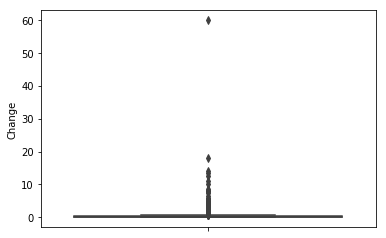

In [7]:
import seaborn as sns
%matplotlib inline
sns.boxplot(y=df['Change'])                    # 透過盒鬚圖可以更快看出最明顯的數值為何

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


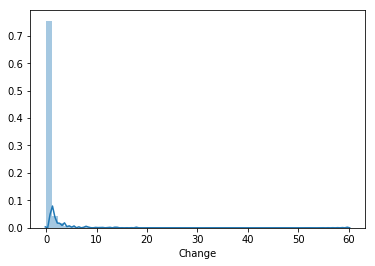

In [8]:
# 利用distplot來看漲跌價差主要集中的區間
sns.distplot(df['Change'])  

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


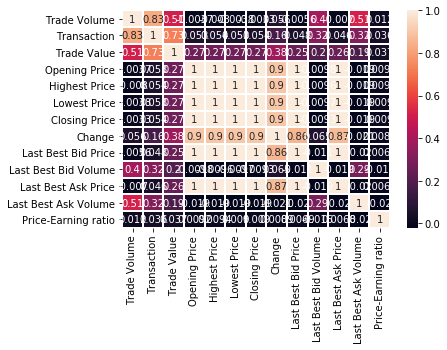

In [9]:
# 各變數間的相關性
sns.heatmap(df.corr(),annot=True,linewidths=1)        

係數為: [[1.01131488]]
截距項為: [-0.05309621]
迴歸式: y= [-0.05309621] + [[1.01131488]] x
預測的漲跌價差: [[10.06005263]]


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


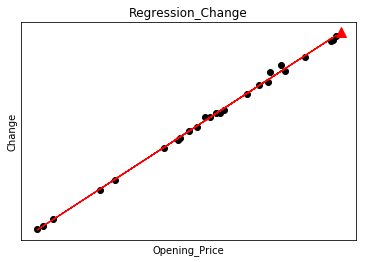

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

Opening_Price = np.array([6.4,7.57,6.16,9.87,8.5,9.11,8.84,7.44,8.13,8.69,7.91,7.83,8.87,7.4,5.25,9.85,9.43,5.41,7.7,7.18,9.93,8.07,8.01,5.15,9.04])
Highest_Price = np.array([6.4,7.61,6.16,9.88,8.53,9.11,8.84,7.45,8.13,8.76,7.95,7.97,9.08,7.4,5.25,9.85,9.45,5.43,7.7,7.18,9.98,8.07,8.05,5.17,9.25])

lm = LinearRegression()
lm.fit(np.reshape(Opening_Price, (len(Opening_Price), 1)), np.reshape(Highest_Price, (len(Highest_Price), 1)))

# 印出係數
print("係數為:",lm.coef_)

# 印出截距
print("截距項為:",lm.intercept_ )

to_be_predicted = np.array([10])
predicted_Change = lm.predict(np.reshape(to_be_predicted, (len(to_be_predicted), 1)))

# 迴歸式
print("迴歸式:","y=",lm.intercept_,"+",lm.coef_,"x")
# 預測的漲跌價差
print("預測的漲跌價差:",predicted_Change)

# 視覺化
plt.scatter(Opening_Price, Highest_Price, color='black')
plt.plot(Opening_Price, lm.predict(np.reshape(Opening_Price, (len(Opening_Price), 1))), color='red', linewidth=1)

plt.plot(to_be_predicted, predicted_Change, color = 'red', marker = '^', markersize = 10)
plt.xticks(())
plt.yticks(())
plt.xlabel('Opening_Price')
plt.ylabel('Change')
plt.title('Regression_Change')

plt.show()